In [13]:
import ROOT
# %jsroot on
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
import random
from utils import ResultSet
from utils import clear, show_value, show_function, normalize_columns, CANVAS, PDG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [7]:
rs = ResultSet("DY2LL",  "/home/caleb/Sources/EGamma/build/output.root")

In [11]:
dir(rs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_function_impl_lookup',
 '_value_lookup',
 'add_collection',
 'calc_shape',
 'collections',
 'draw',
 'get_draw_option',
 'get_hist_set',
 'hist_array_single',
 'input_filename',
 'load_objects',
 'map',
 'matched_hits_from_B1',
 'matched_hits_from_B2',
 'matched_track_dphis_v_eta_B1',
 'matched_track_dphis_v_eta_B2',
 'matched_track_dphis_v_eta_B3',
 'matched_track_dphis_v_eta_B4',
 'matched_track_dphis_v_eta_F1',
 'matched_track_dphis_v_eta_F2',
 'matched_track_dphis_v_eta_F3',
 'matched_track_dphis_v_eta_all',
 'matched_track_drs_v_eta_F1',
 'matched_track_drs_v_eta_F2',
 'matched_track_drs_v_eta_F3',
 'matched_track_

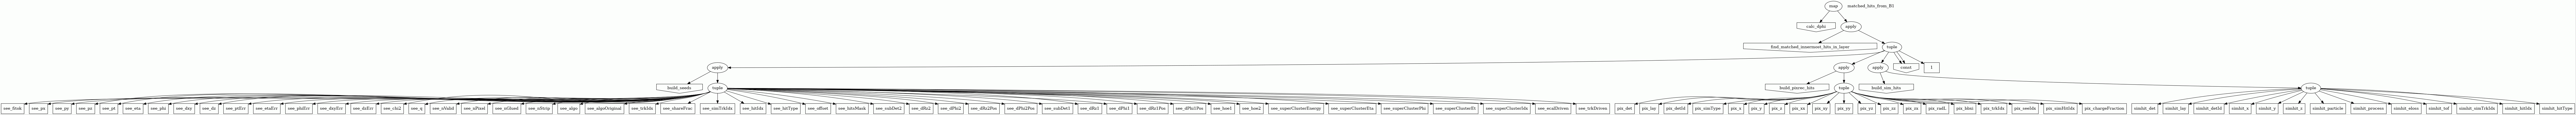

*calc_dphi*
-----
```cpp
([](const HitPair &hit_pair) {
  const auto &rec_hit = std::get<PixRecHit>(hit_pair);
  const auto &sim_hit = std::get<SimHit>(hit_pair);
  return atan2(rec_hit.x, rec_hit.y) - atan2(sim_hit.x, sim_hit.y);
})

```

---
*find_matched_innermost_hits_in_layer*
-----
```cpp
([](const vector<Seed> &seeds, const vector<PixRecHit> &pixrec_hits,
    const vector<SimHit> &sim_hits, const int &&bpix_layer) {
  vector<HitPair> matched_hits;
  for (const Seed &seed : seeds) {
    if (seed.algoOriginal < 0 || seed.algoOriginal >= seedTypes.size())
      continue;
    for (auto tup : boost::combine(seed.hitIdx, seed.hitType)) {
      int hitIdx, hitType;
      boost::tie(hitIdx, hitType) = tup;
      if (hitType != HIT_TYPE_PIXEL)
        continue;
      const PixRecHit &rec_hit = pixrec_hits[hitIdx];
      if (rec_hit.det == PIXEL_BARREL && rec_hit.lay == bpix_layer) {
        if (rec_hit.simHitIdx.size() > 0) {
          matched_hits.push_back({rec_hit, sim_hits[rec_hit.simHitIdx[0]]});
        }
      }
      break;
    }
  }
  return matched_hits;
})

```

---
*build_seeds*
-----
```cpp
([](const vector<short> &fitok, const vector<float> &px,
    const vector<float> &py, const vector<float> &pz, const vector<float> &pt,
    const vector<float> &eta, const vector<float> &phi,
    const vector<float> &dxy, const vector<float> &dz,
    const vector<float> &ptErr, const vector<float> &etaErr,
    const vector<float> &phiErr, const vector<float> &dxyErr,
    const vector<float> &dzErr, const vector<float> &chi2, const vector<int> &q,
    const vector<unsigned int> &nValid, const vector<unsigned int> &nPixel,
    const vector<unsigned int> &nGlued, const vector<unsigned int> &nStrip,
    const vector<unsigned int> &algo, const vector<unsigned int> &algoOriginal,
    const vector<int> &trkIdx, const vector<vector<float>> &shareFrac,
    const vector<vector<int>> &simTrkIdx, const vector<vector<int>> &hitIdx,
    const vector<vector<int>> &hitType, const vector<unsigned int> &offset,
    const vector<unsigned char> &hitsMask, const vector<int> &subDet2,
    const vector<float> &dRz2, const vector<float> &dPhi2,
    const vector<float> &dRz2Pos, const vector<float> &dPhi2Pos,
    const vector<int> &subDet1, const vector<float> &dRz1,
    const vector<float> &dPhi1, const vector<float> &dRz1Pos,
    const vector<float> &dPhi1Pos, const vector<float> &hoe1,
    const vector<float> &hoe2, const vector<float> &superClusterEnergy,
    const vector<float> &superClusterEta, const vector<float> &superClusterPhi,
    const vector<float> &superClusterEt, const vector<int> &superClusterIdx,
    const vector<unsigned int> &ecalDriven,
    const vector<unsigned int> &trkDriven) {
  std::vector<Seed> seeds;
  for (int i = 0; i < fitok.size(); i++)
    seeds.push_back({i,
                     fitok[i],
                     px[i],
                     py[i],
                     pz[i],
                     pt[i],
                     eta[i],
                     phi[i],
                     dxy[i],
                     dz[i],
                     ptErr[i],
                     etaErr[i],
                     phiErr[i],
                     dxyErr[i],
                     dzErr[i],
                     chi2[i],
                     q[i],
                     nValid[i],
                     nPixel[i],
                     nGlued[i],
                     nStrip[i],
                     algo[i],
                     algoOriginal[i],
                     trkIdx[i],
                     shareFrac[i],
                     simTrkIdx[i],
                     hitIdx[i],
                     hitType[i],
                     offset[i],
                     hitsMask[i],
                     subDet2[i],
                     dRz2[i],
                     dPhi2[i],
                     dRz2Pos[i],
                     dPhi2Pos[i],
                     subDet1[i],
                     dRz1[i],
                     dPhi1[i],
                     dRz1Pos[i],
                     dPhi1Pos[i],
                     hoe1[i],
                     hoe2[i],
                     superClusterEnergy[i],
                     superClusterEta[i],
                     superClusterPhi[i],
                     superClusterEt[i],
                     superClusterIdx[i],
                     ecalDriven[i],
                     trkDriven[i]});
  return seeds;
})

```

---
*build_pixrec_hits*
-----
```cpp
([](const vector<unsigned short> &det, const vector<unsigned short> &lay,
    const vector<unsigned int> &detId, const vector<unsigned short> &simType,
    const vector<float> &x, const vector<float> &y, const vector<float> &z,
    const vector<float> &xx, const vector<float> &xy, const vector<float> &yy,
    const vector<float> &yz, const vector<float> &zz, const vector<float> &zx,
    const vector<float> &radL, const vector<float> &bbxi,
    const vector<vector<int>> &trkIdx, const vector<vector<int>> &seeIdx,
    const vector<vector<int>> &simHitIdx,
    const vector<vector<float>> &chargeFraction) {
  std::vector<PixRecHit> pixrec_hits;
  for (int i = 0; i < det.size(); i++)
    pixrec_hits.push_back(
        {i,       det[i],    lay[i],    detId[i],     simType[i],
         x[i],    y[i],      z[i],      xx[i],        xy[i],
         yy[i],   yz[i],     zz[i],     zx[i],        radL[i],
         bbxi[i], trkIdx[i], seeIdx[i], simHitIdx[i], chargeFraction[i]});
  return pixrec_hits;
})

```

---
*build_sim_hits*
-----
```cpp
([](const vector<unsigned short> &det, const vector<unsigned short> &lay,
    const vector<unsigned int> &detId, const vector<float> &x,
    const vector<float> &y, const vector<float> &z, const vector<int> &particle,
    const vector<short> &process, const vector<float> &eloss,
    const vector<float> &tof, const vector<int> &simTrkIdx,
    const vector<vector<int>> &hitIdx, const vector<vector<int>> &hitType) {
  std::vector<SimHit> sim_hits;
  for (int i = 0; i < det.size(); i++)
    sim_hits.push_back({i, det[i], lay[i], detId[i], x[i], y[i], z[i],
                        particle[i], process[i], eloss[i], tof[i], simTrkIdx[i],
                        hitIdx[i], hitType[i]});
  return sim_hits;
})

```

---
*const*
-----
```cpp

```

---
*const*
-----
```cpp

```

---

In [12]:
img, fns = show_value(rs, 'matched_hits_from_B1')
display(img)
display(fns)
# display(show_value(hists_TTTT.mc_top_mass))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


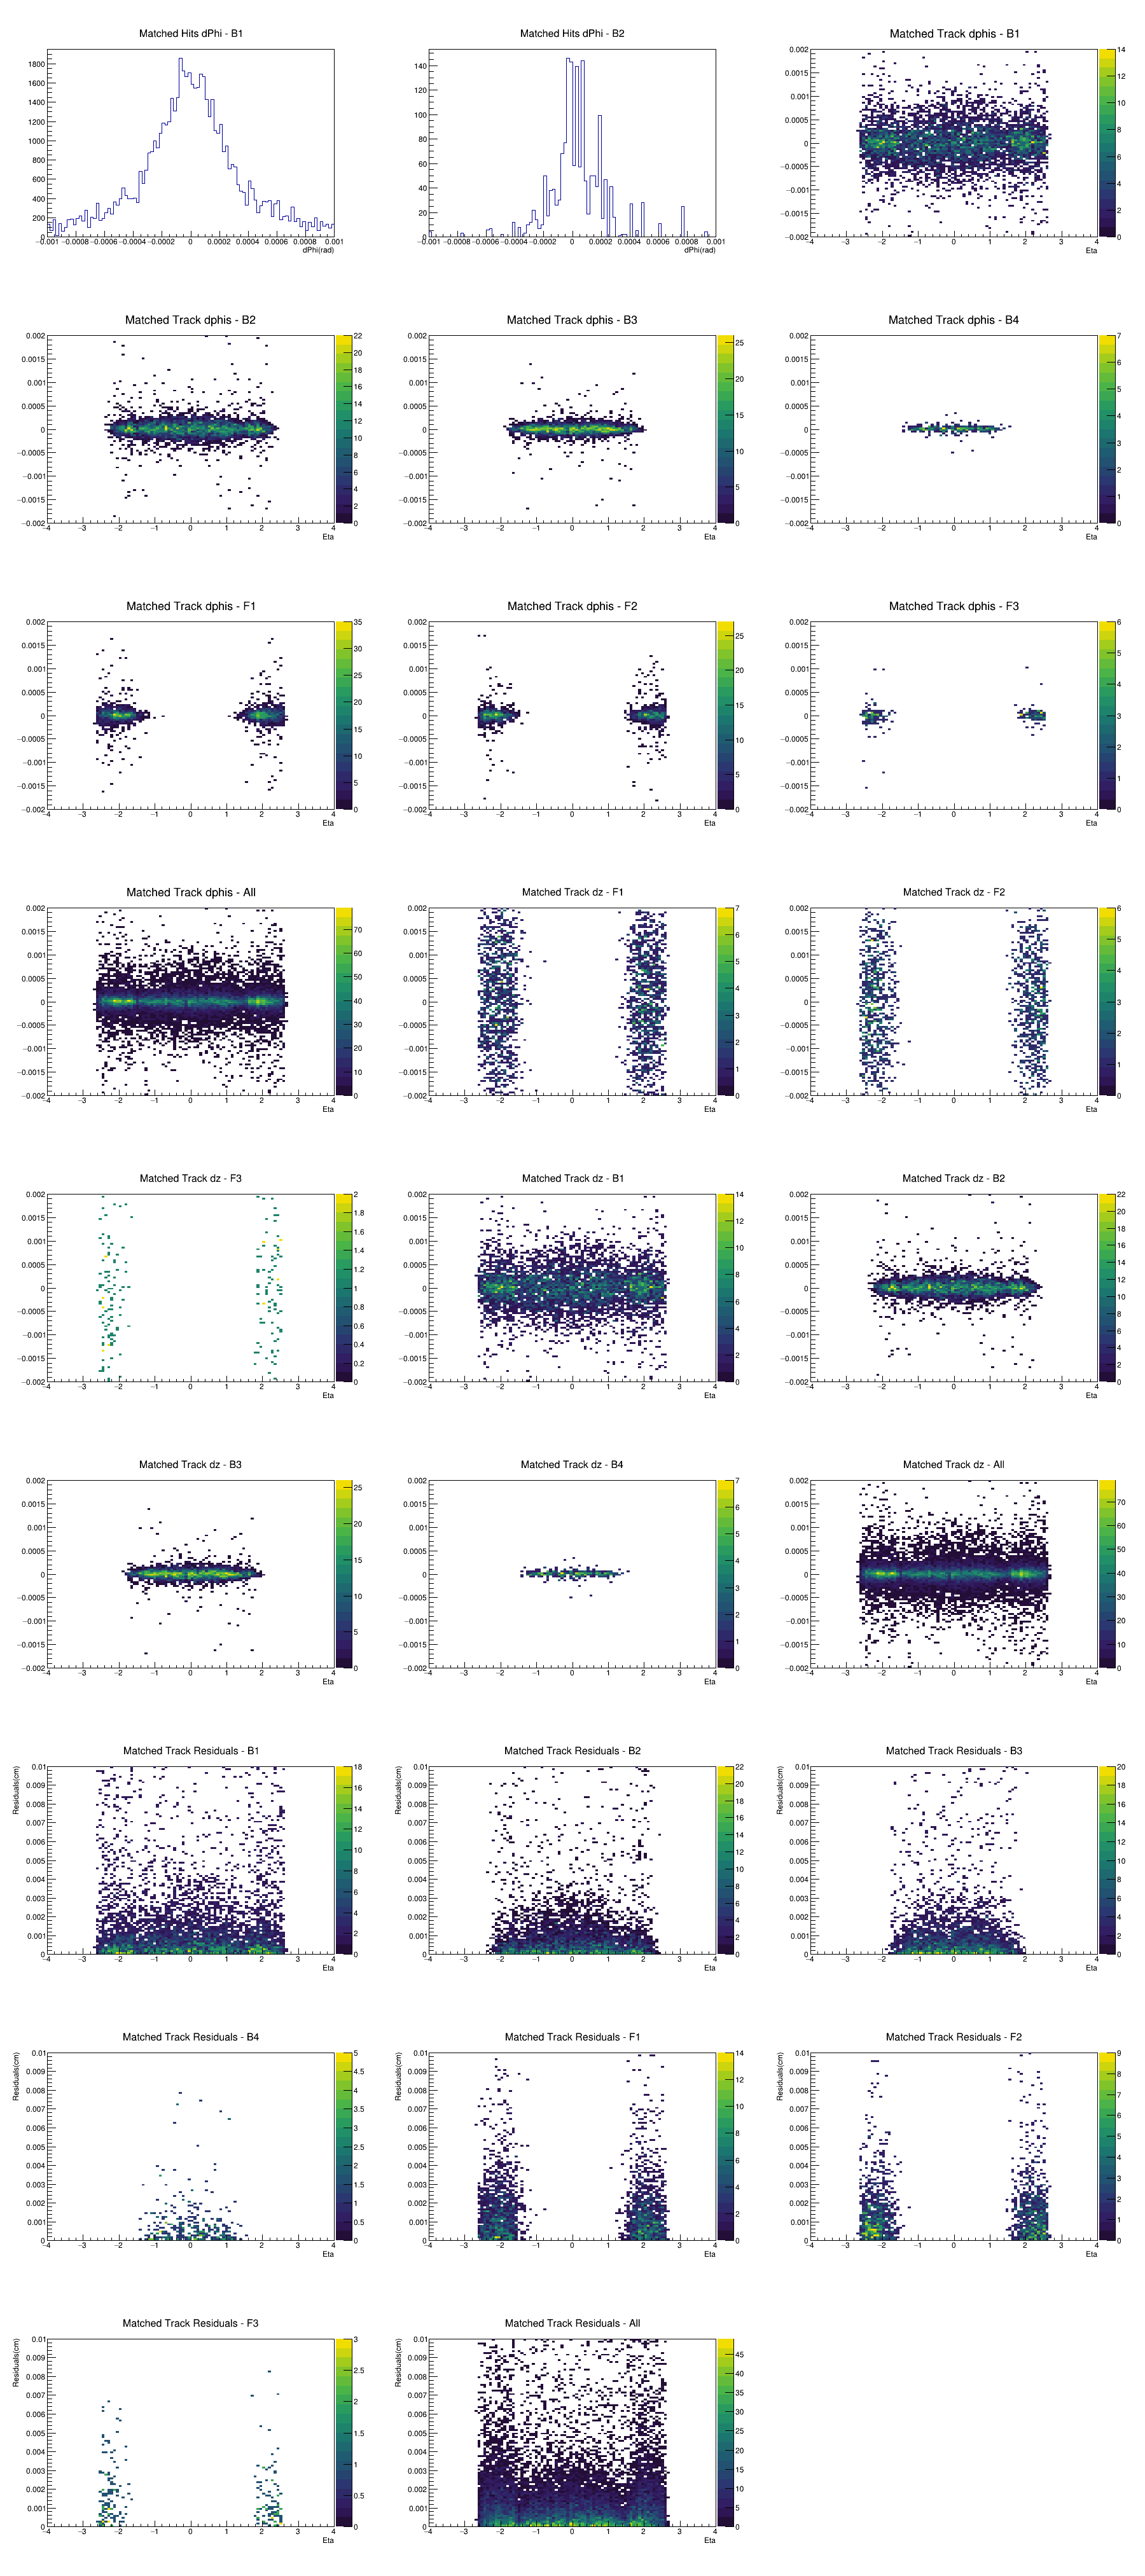

In [14]:
rs.draw()

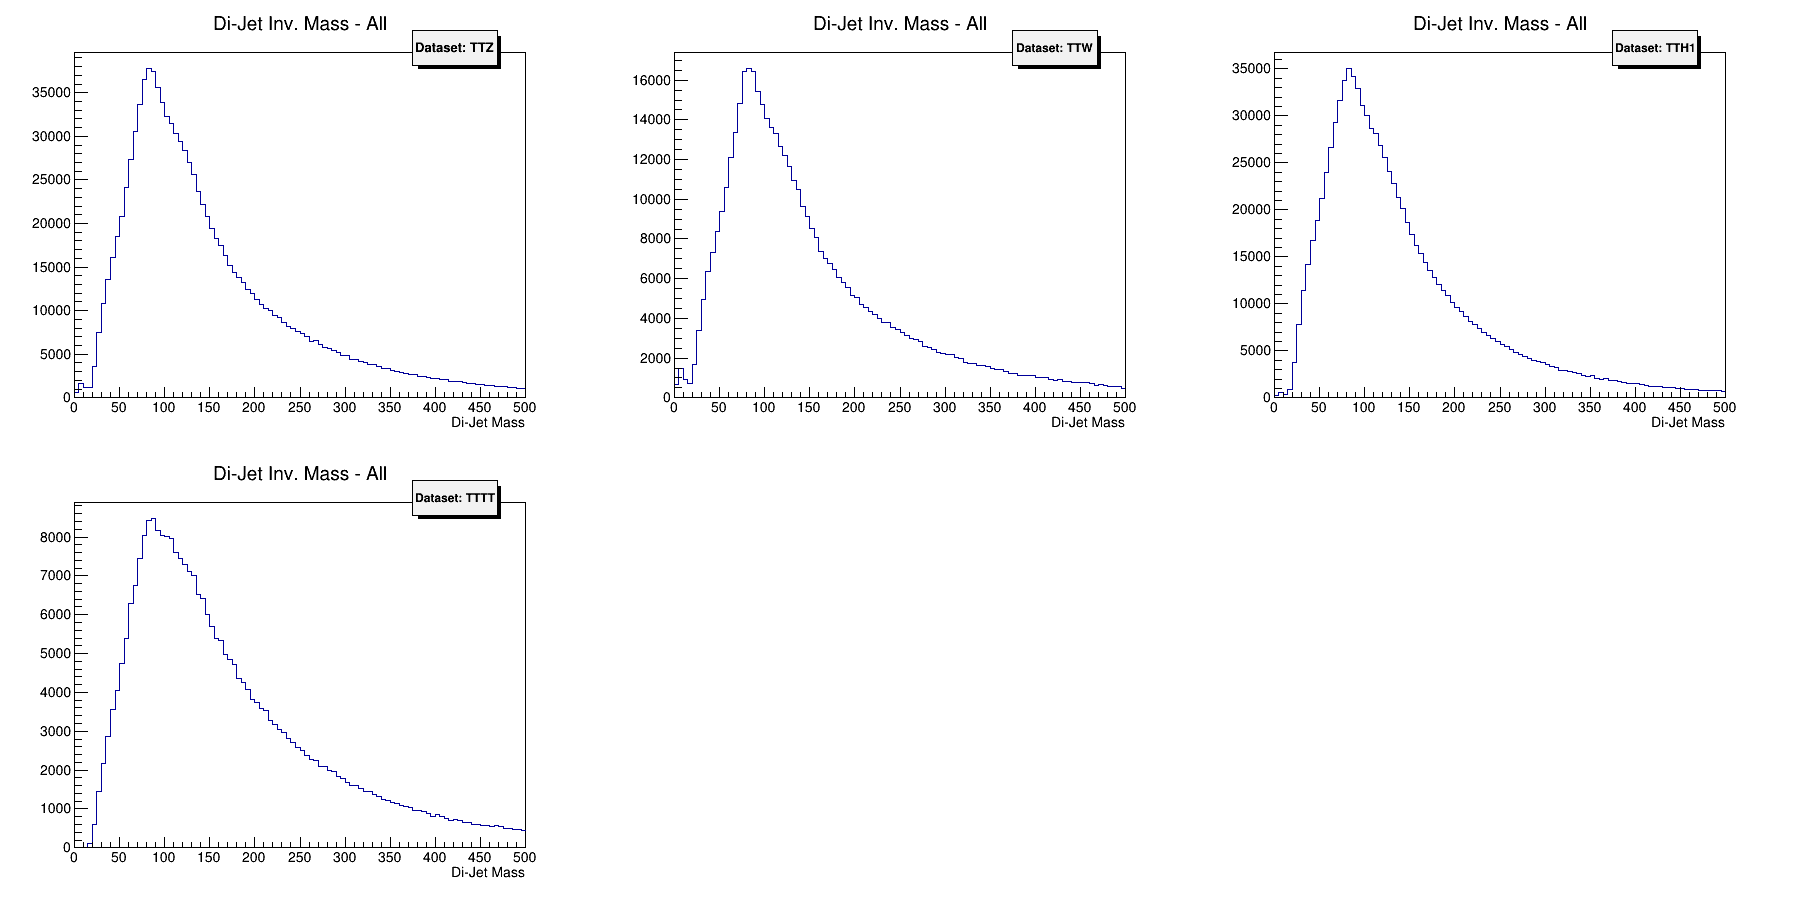

In [7]:
clear()
ResultSet.hist_array_single('dijet_inv_mass')
CANVAS.Draw()

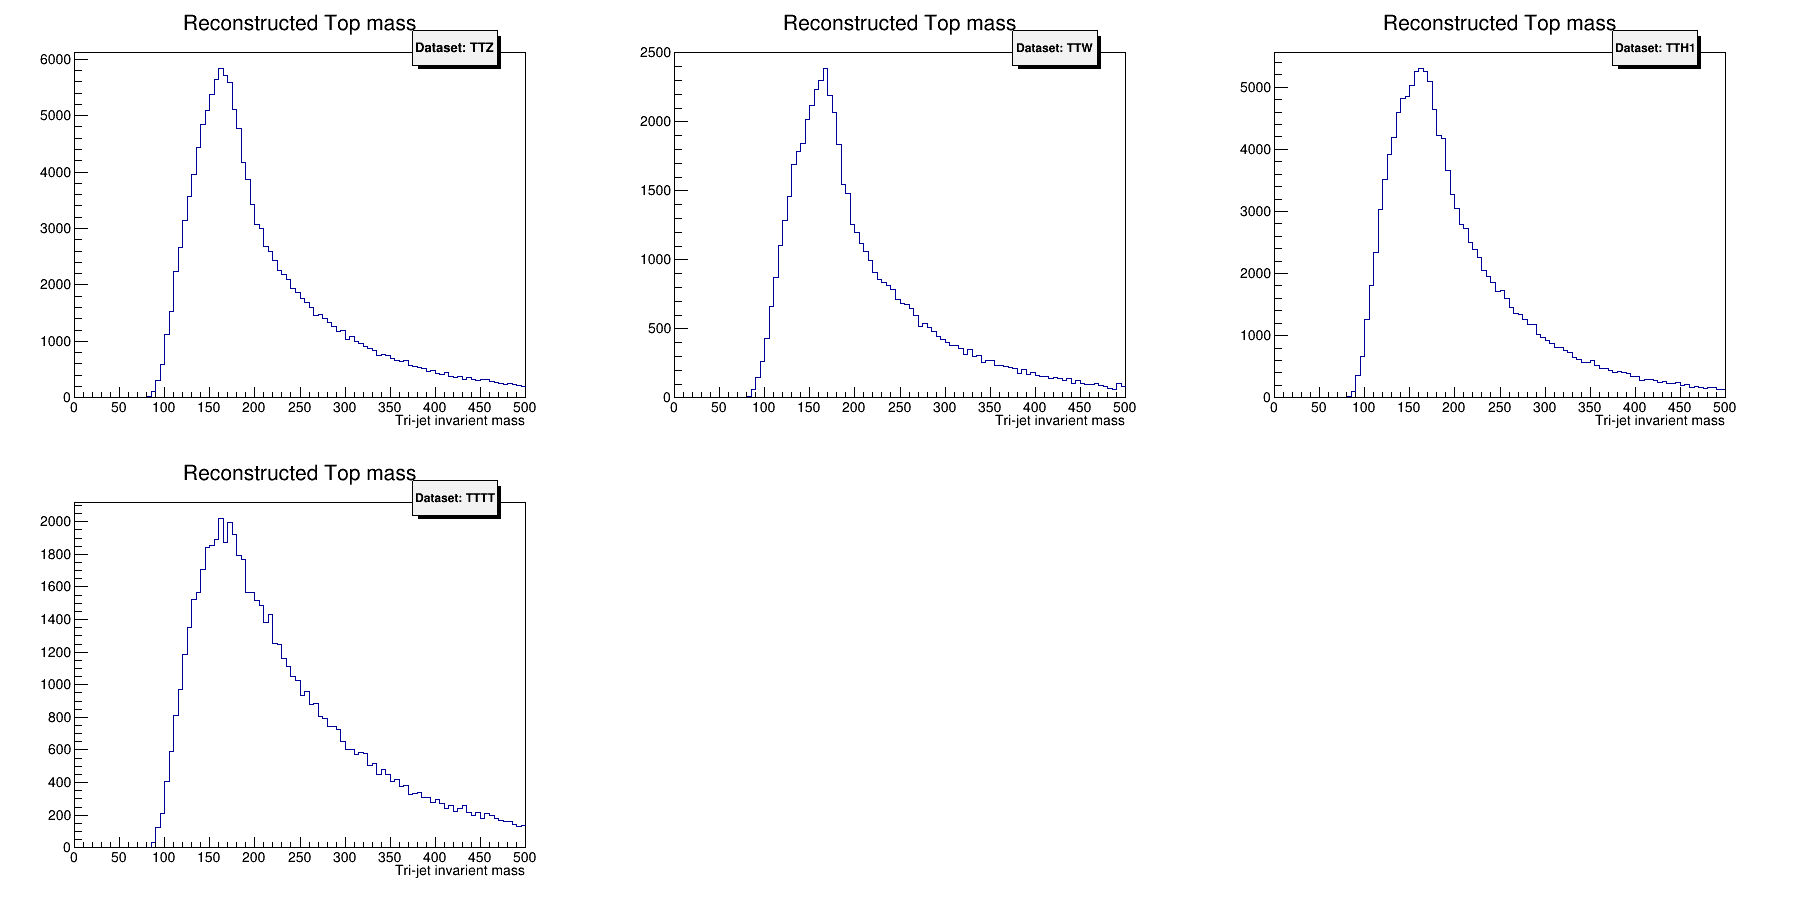

In [8]:
clear()
ResultSet.hist_array_single('reco_top_mass')
CANVAS.Draw()

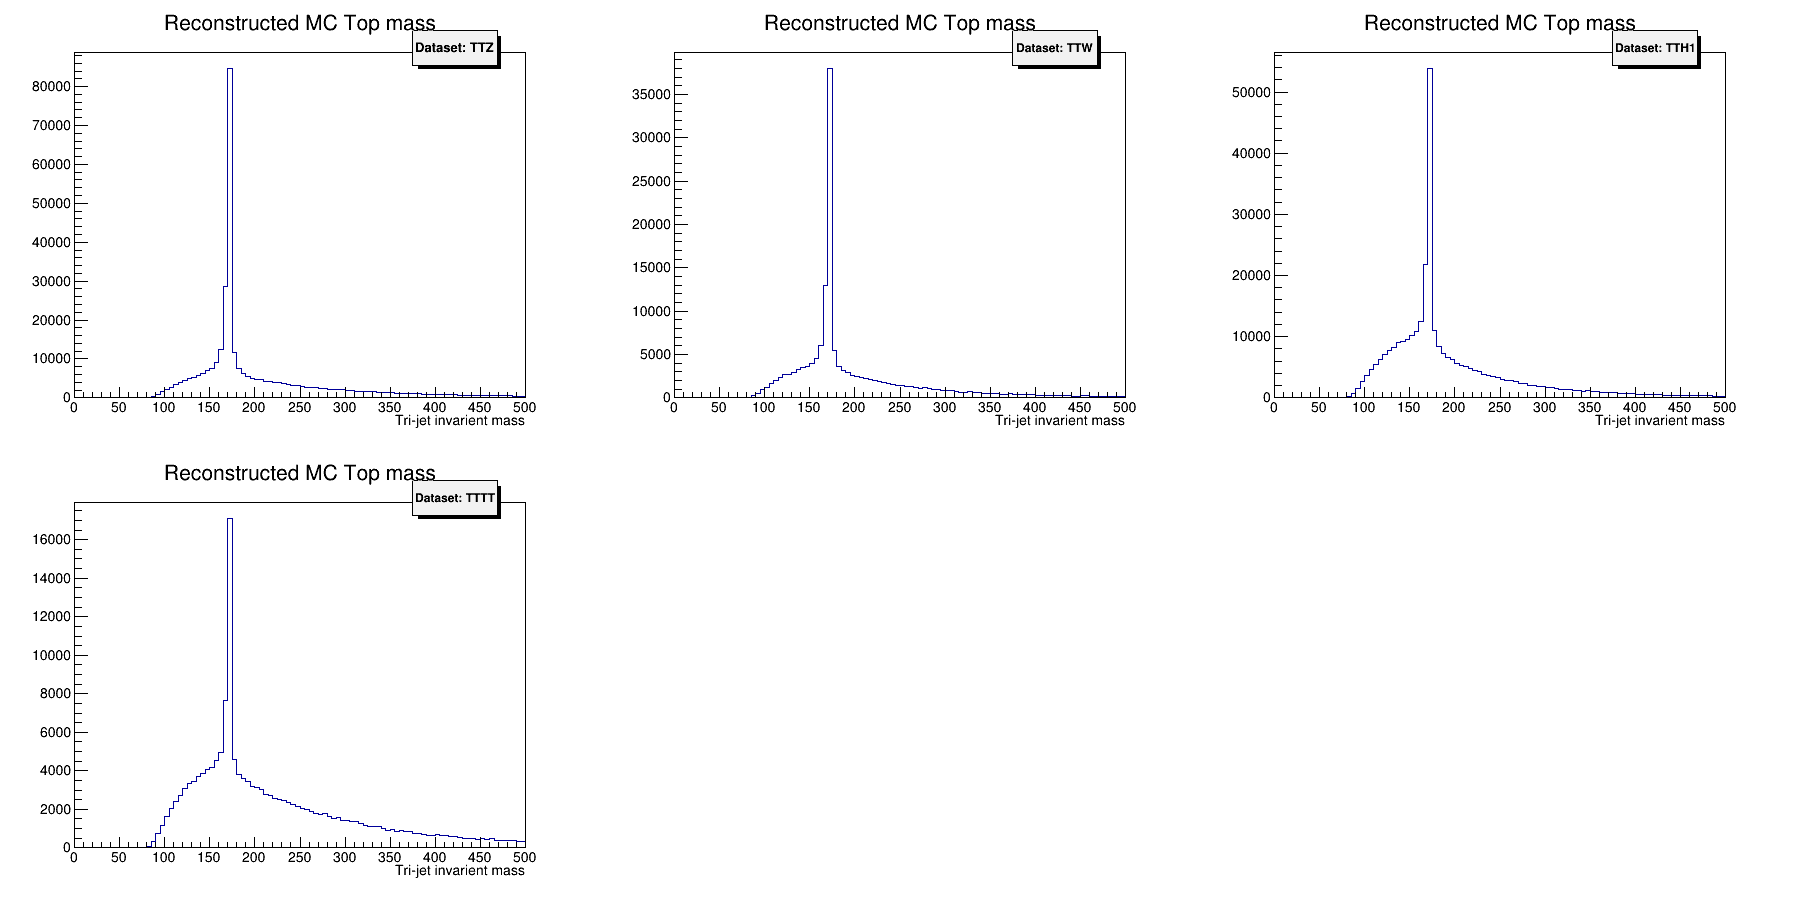

In [9]:
clear()
ResultSet.hist_array_single('mc_top_mass')
CANVAS.Draw()

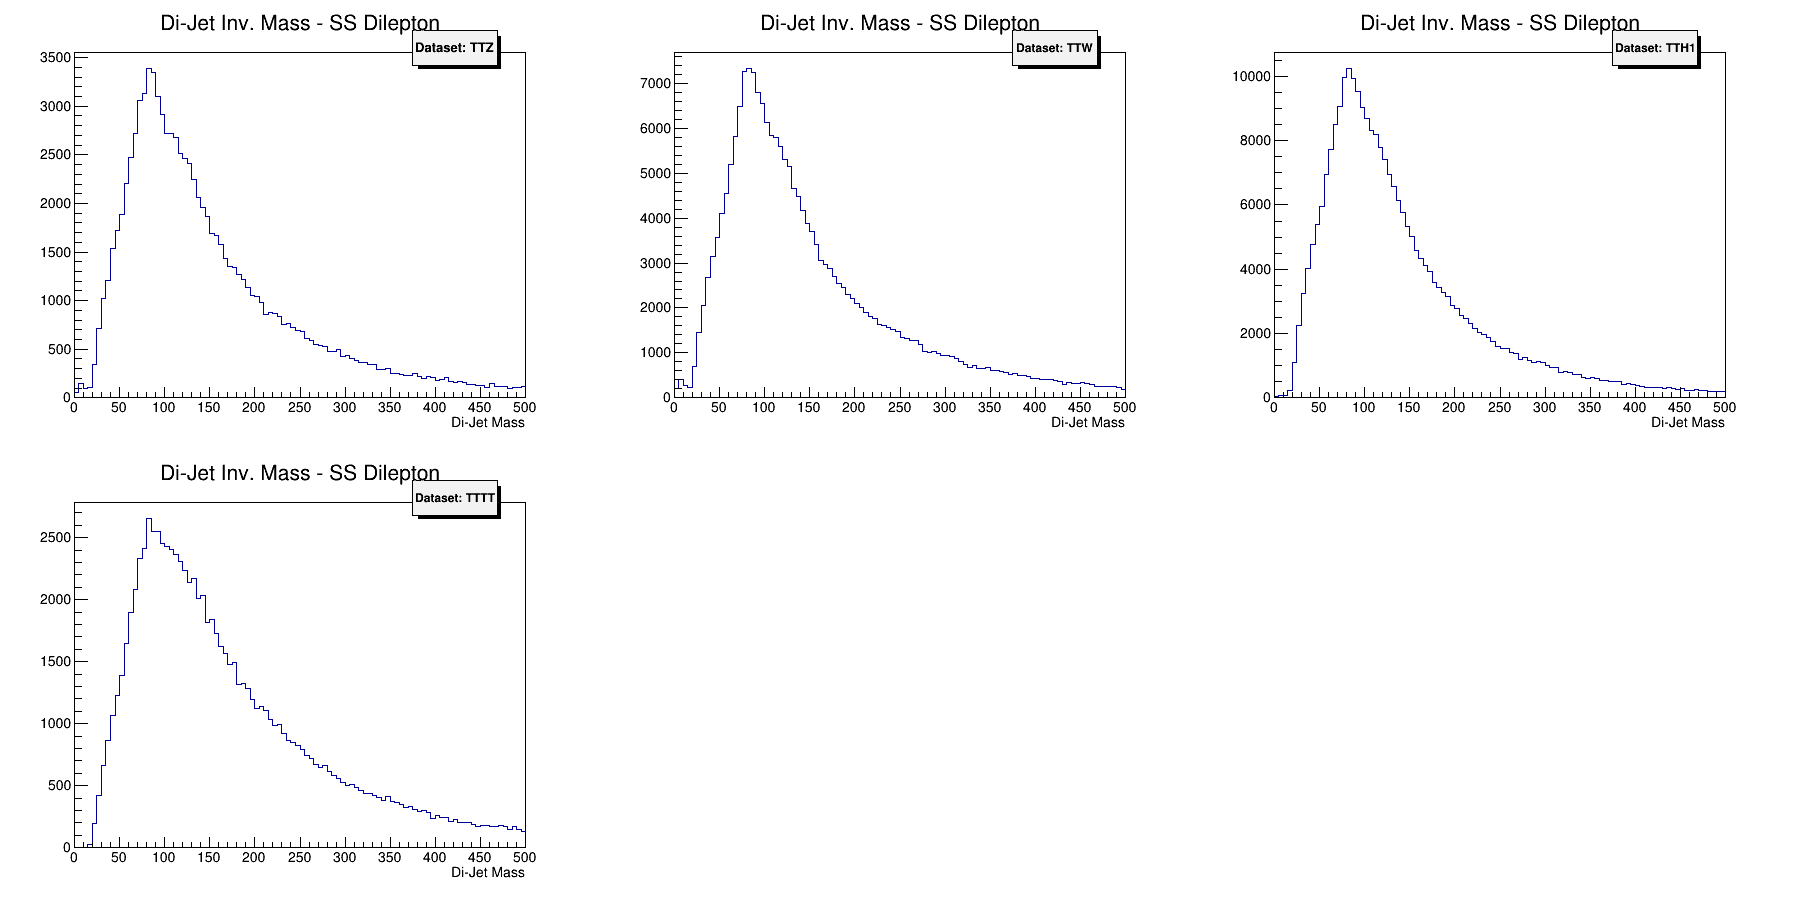

In [10]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_ssdilepton')
CANVAS.Draw()

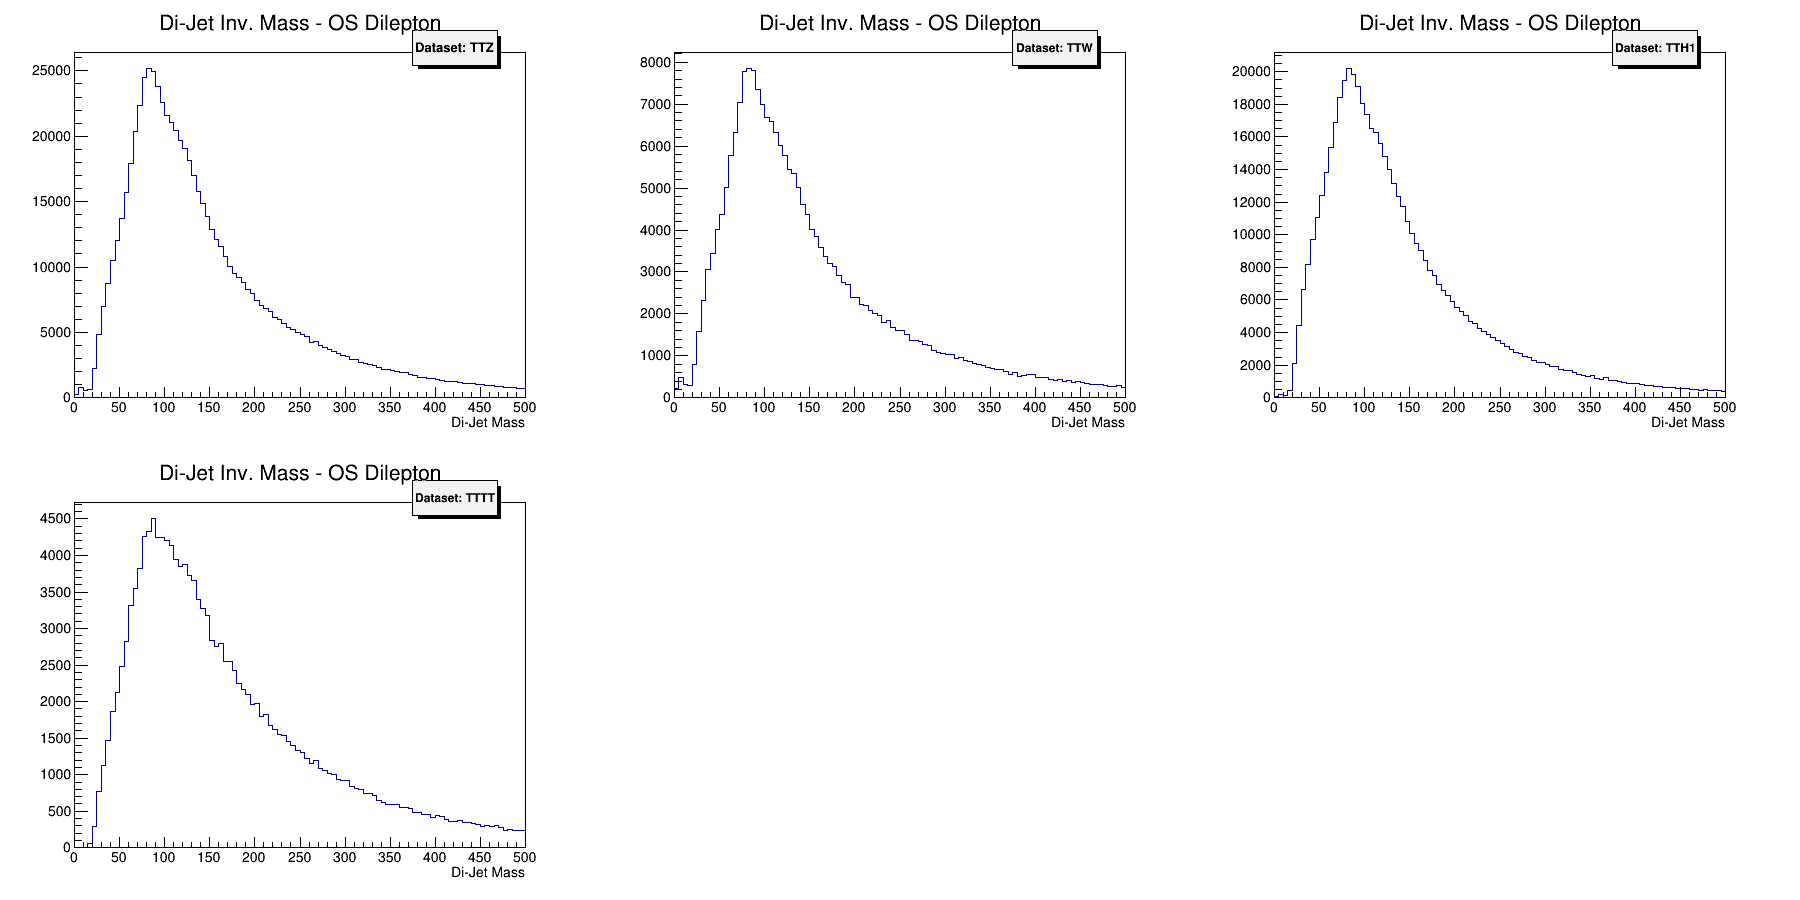

In [11]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_osdilepton')
CANVAS.Draw()

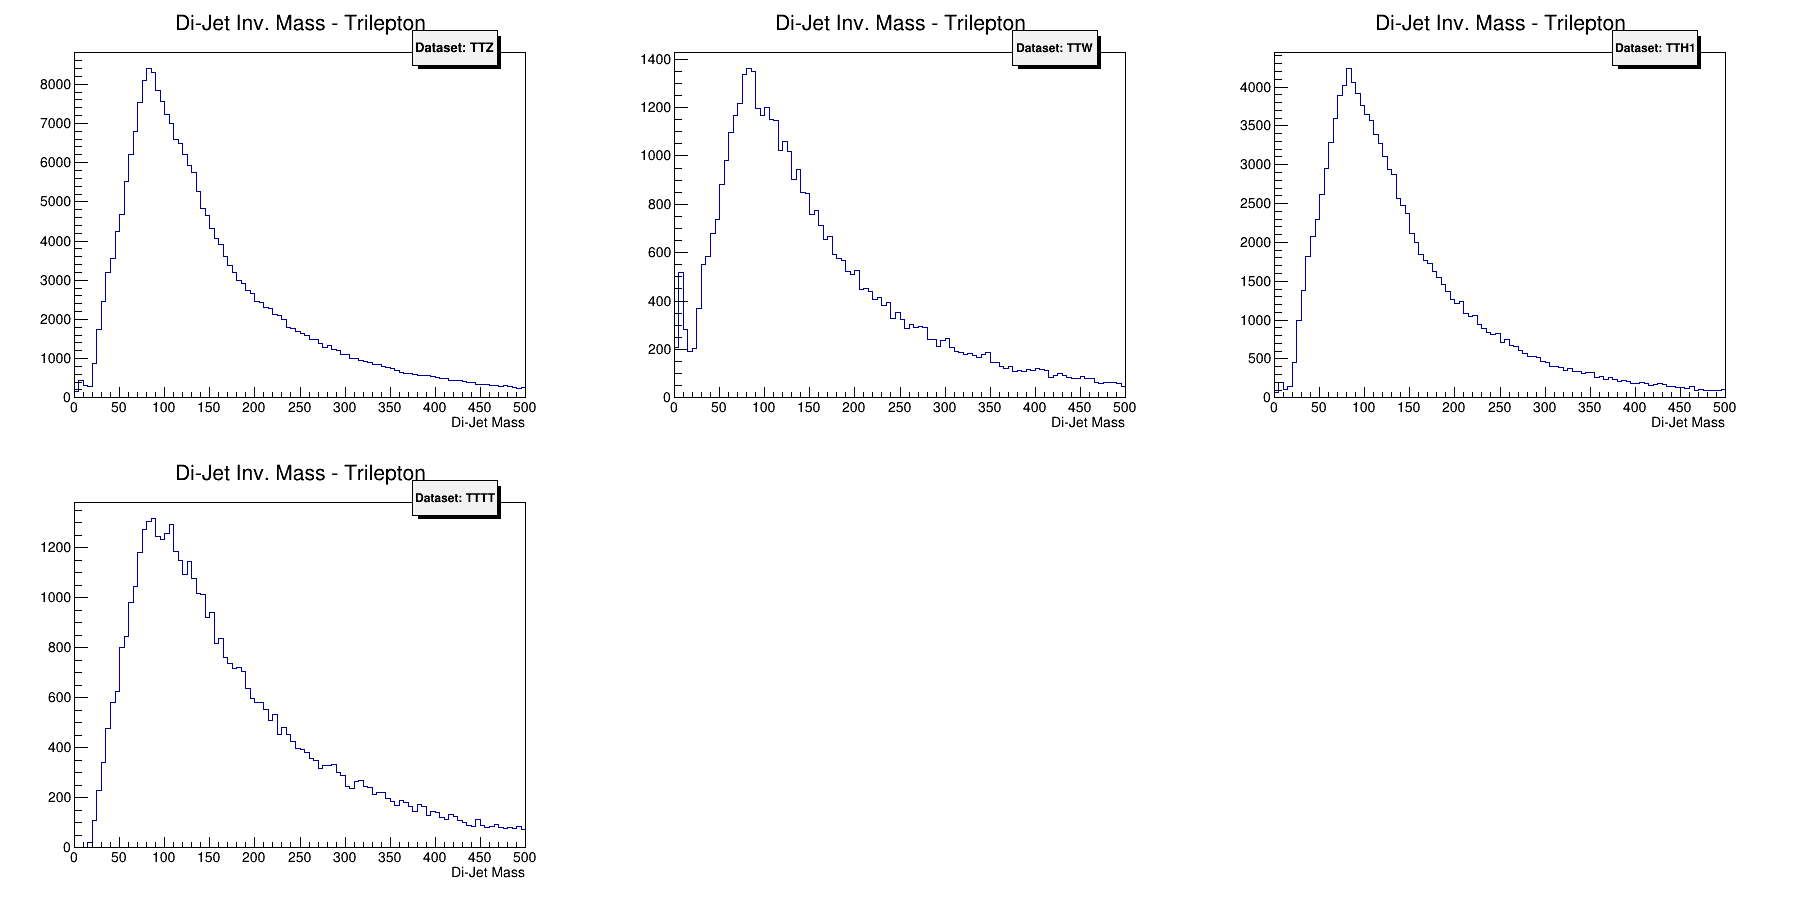

In [12]:
clear()
ResultSet.hist_array_single('dijet_inv_mass_trilepton')
CANVAS.Draw()

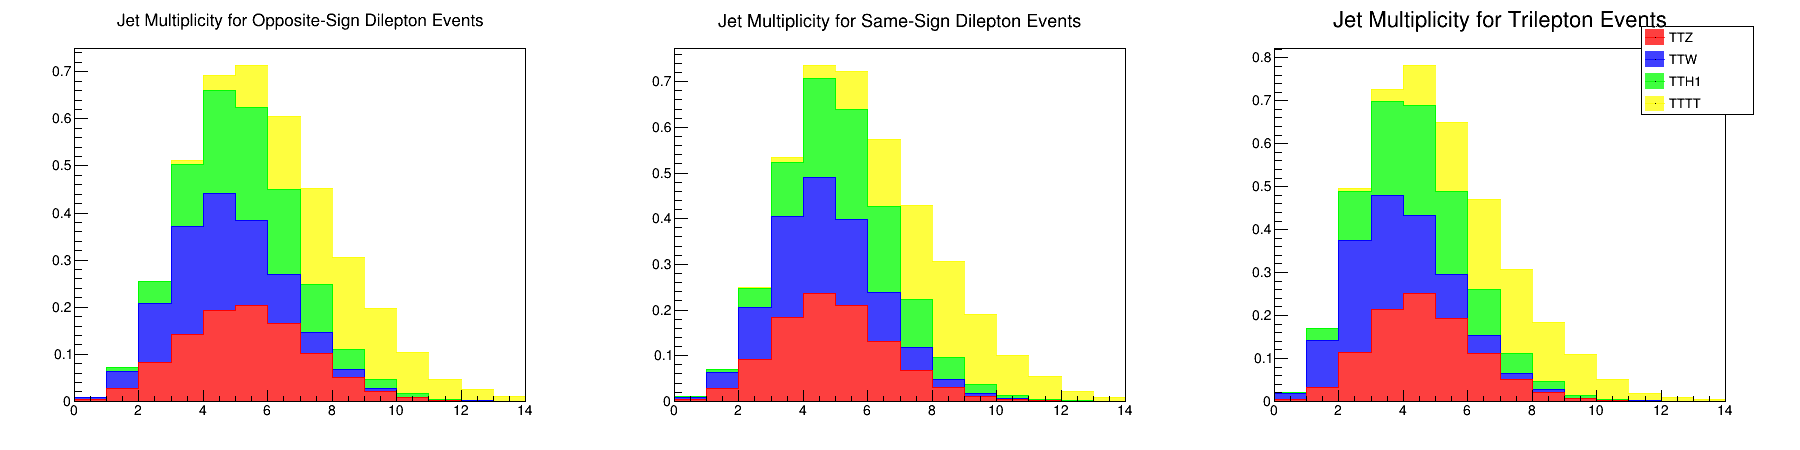

In [13]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=1,
                           enable_fill=True,
                           shape=(3,1),
                          )
CANVAS.Draw()

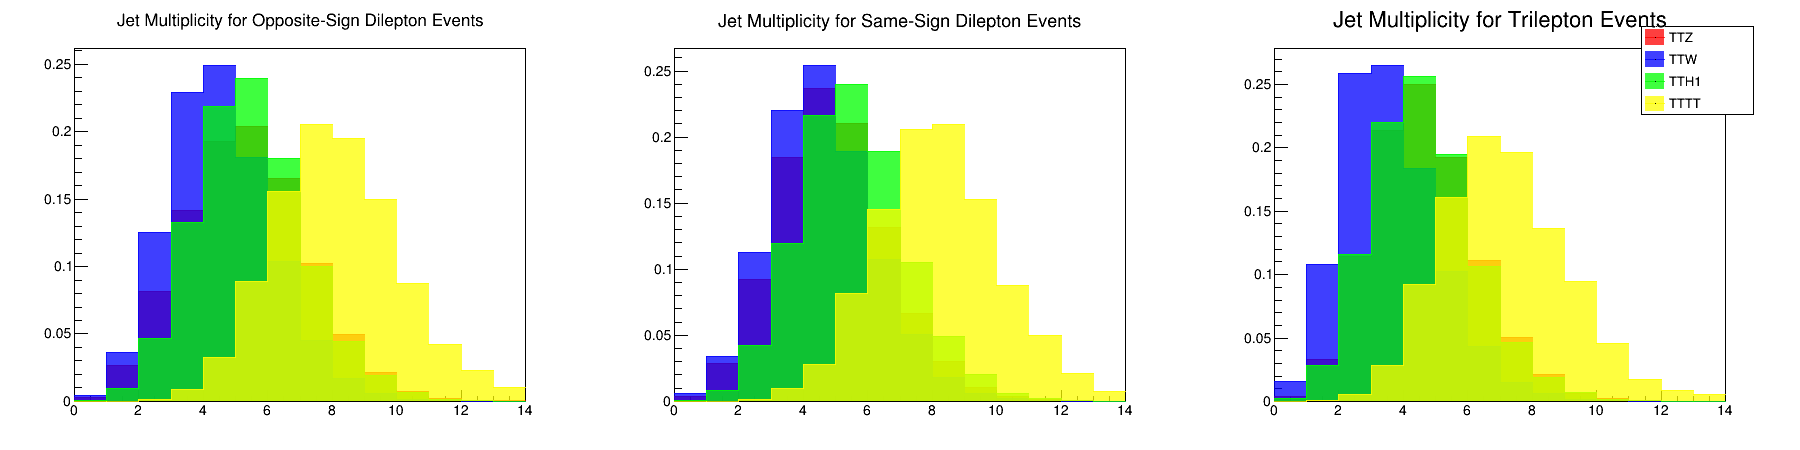

In [14]:
CANVAS.Clear()
ResultSet.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                                ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                                ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                               ),
                           normalize_to=1,
                           enable_fill=True,
                           shape=(3,1),
                           draw_option='nostack',
                          )
CANVAS.Draw()

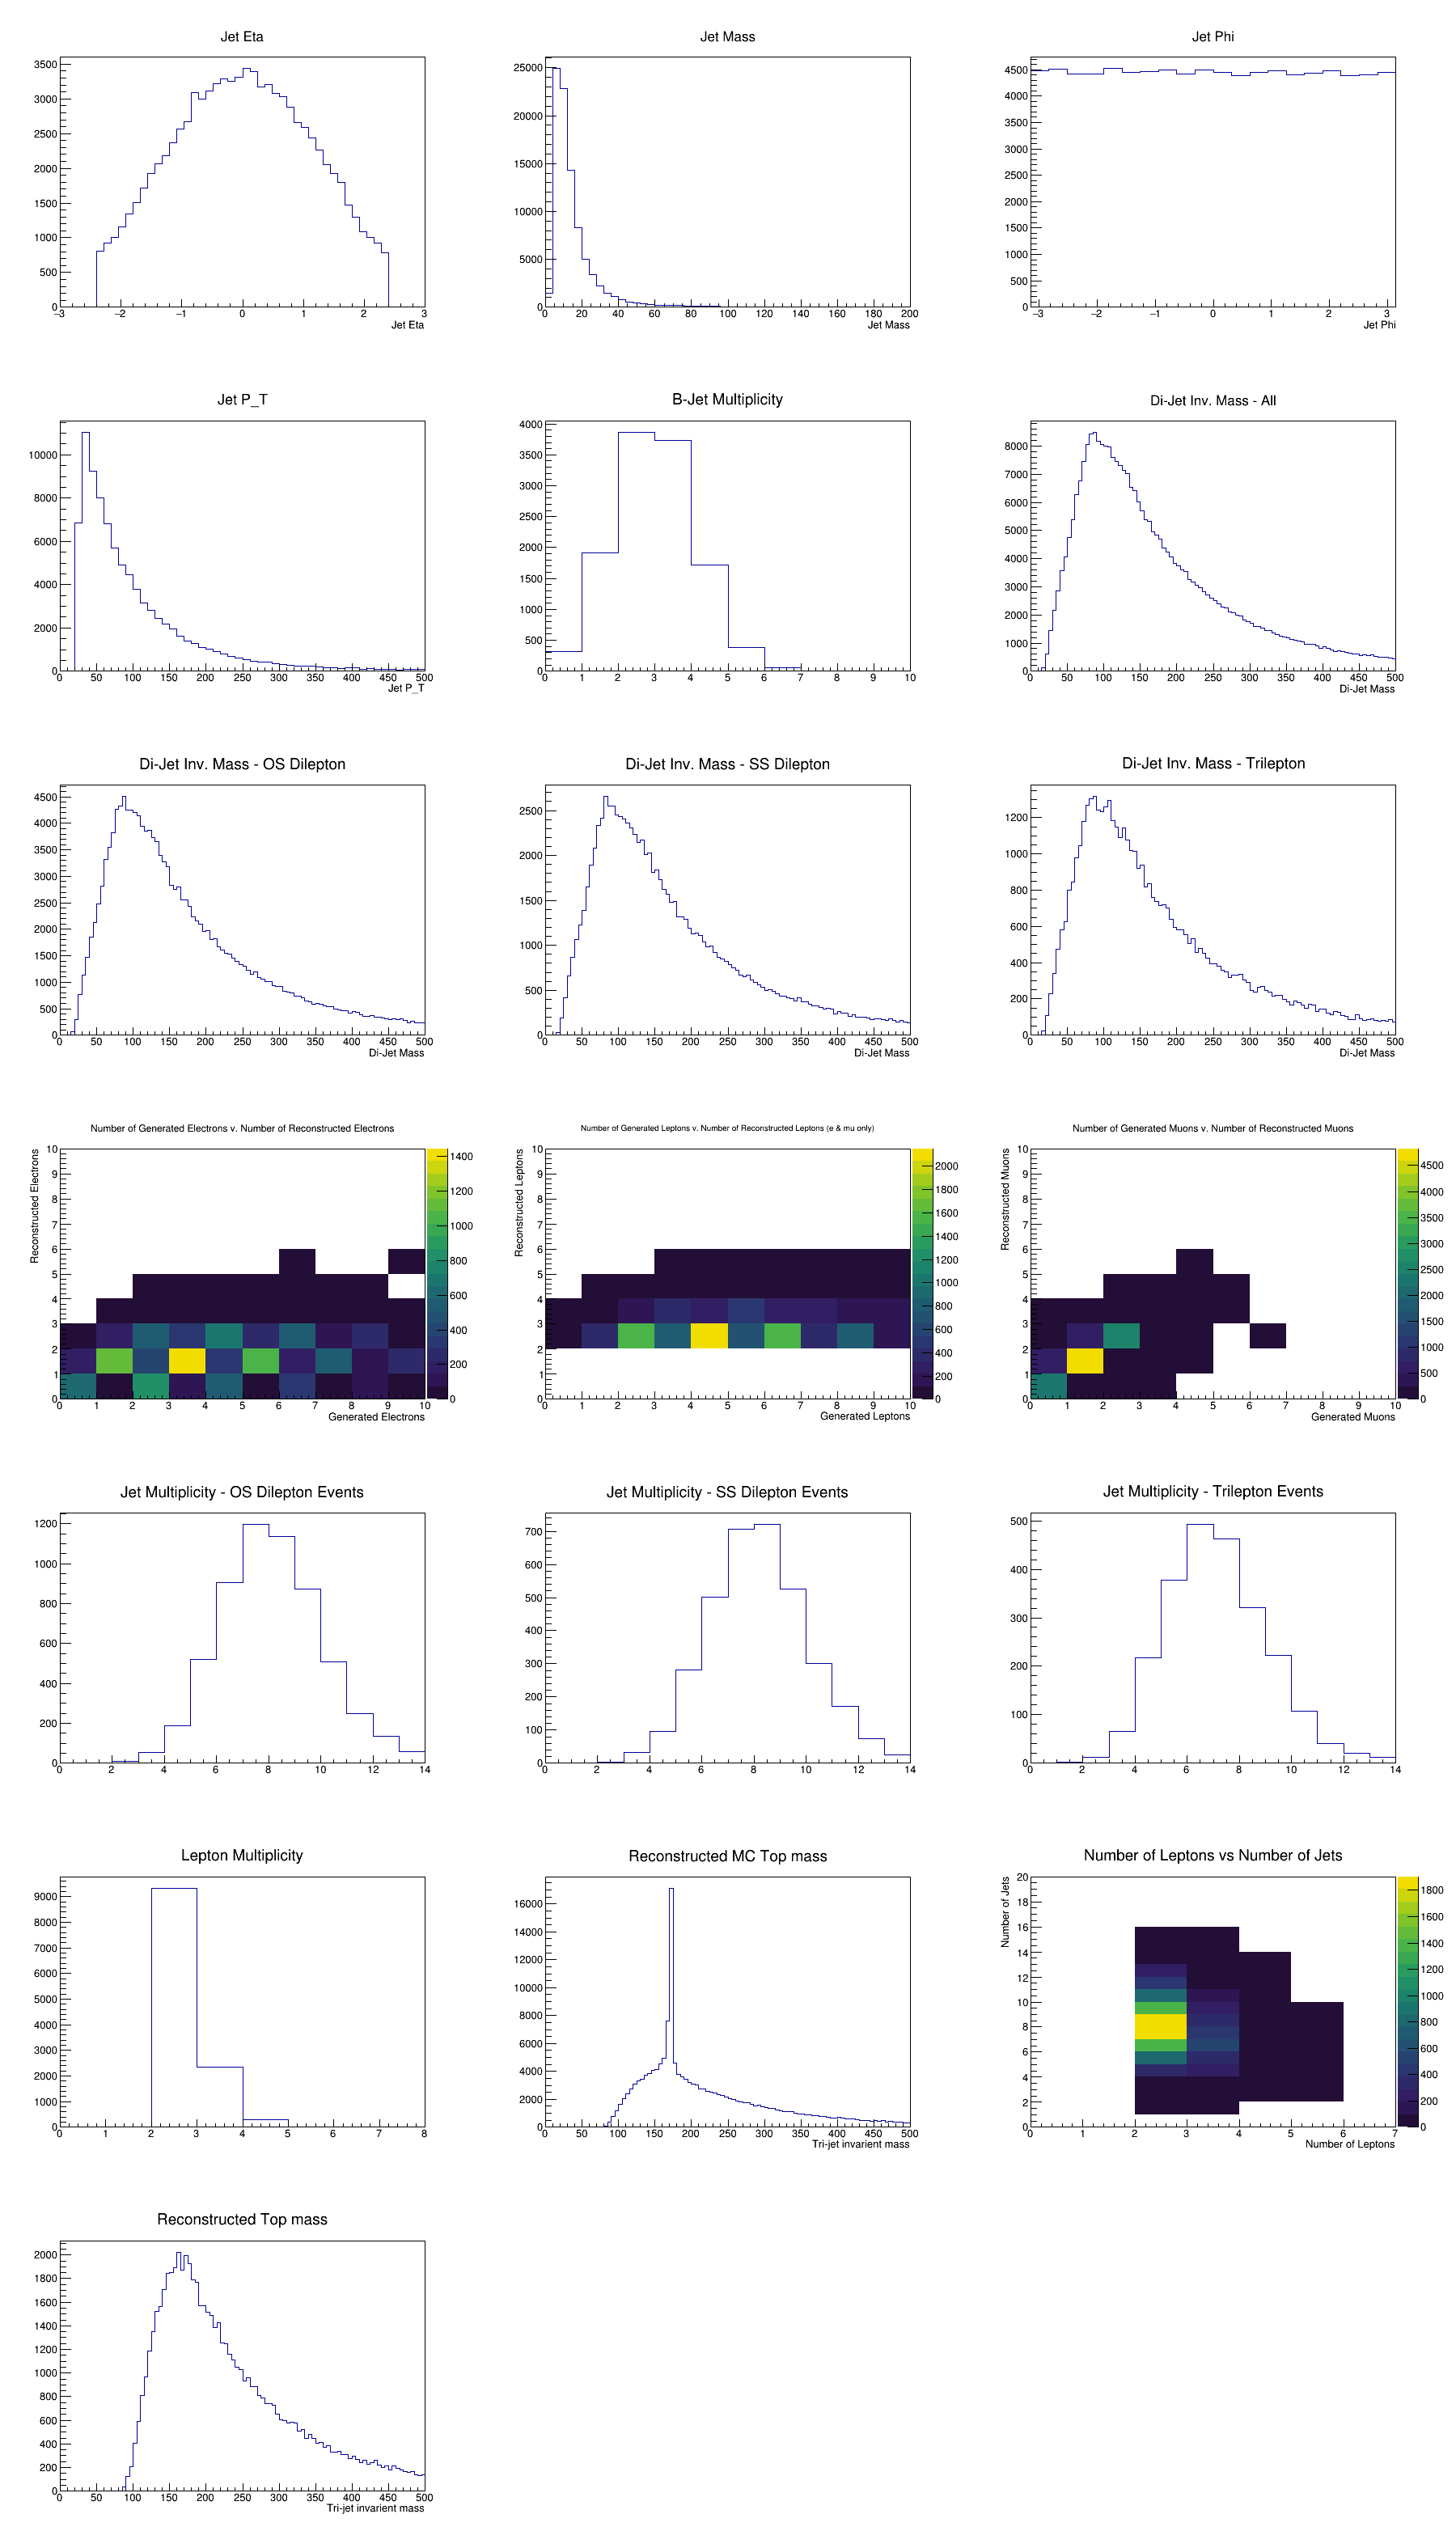

In [15]:
rs_TTTT.draw()

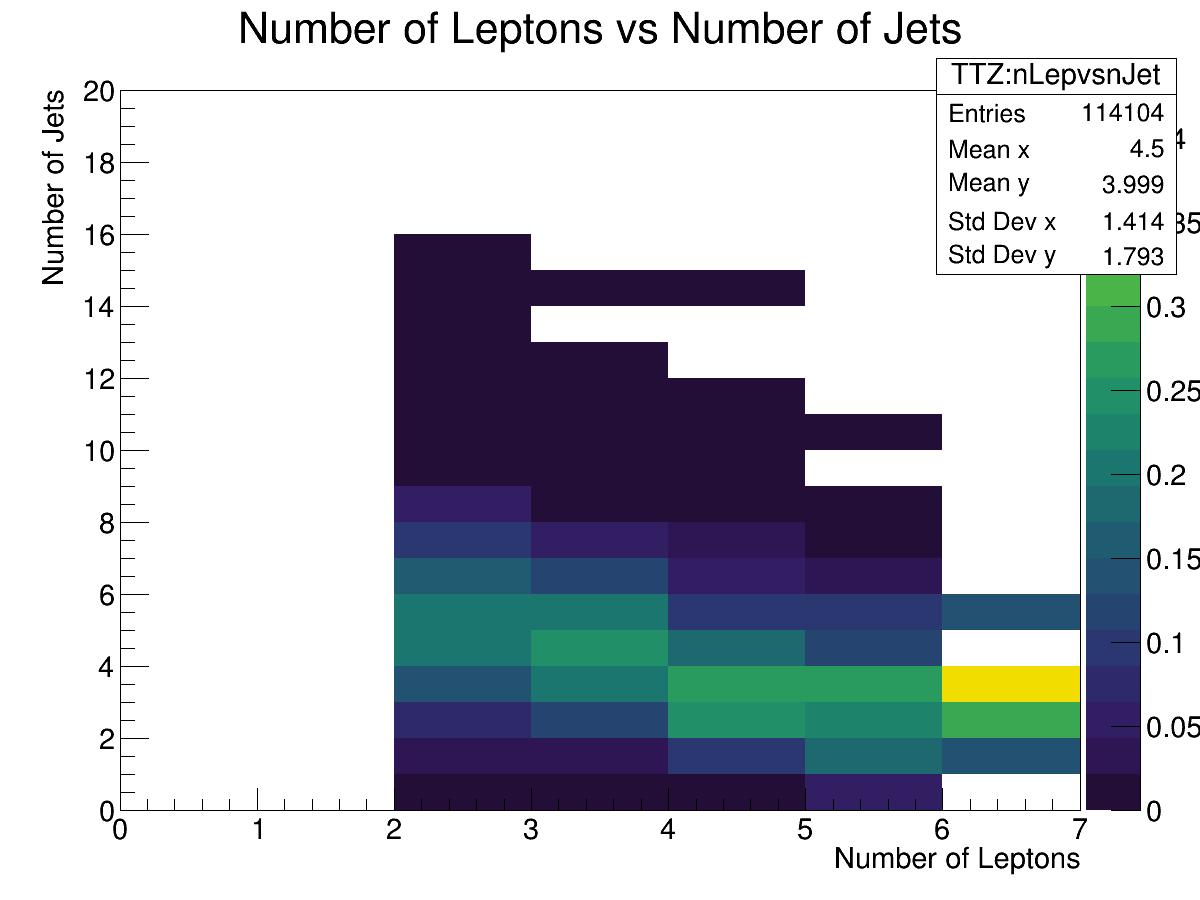

In [16]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.nLepvsnJet)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.nLepvsnJet)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.nLepvsnJet)
clear()
rs_TTZ.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

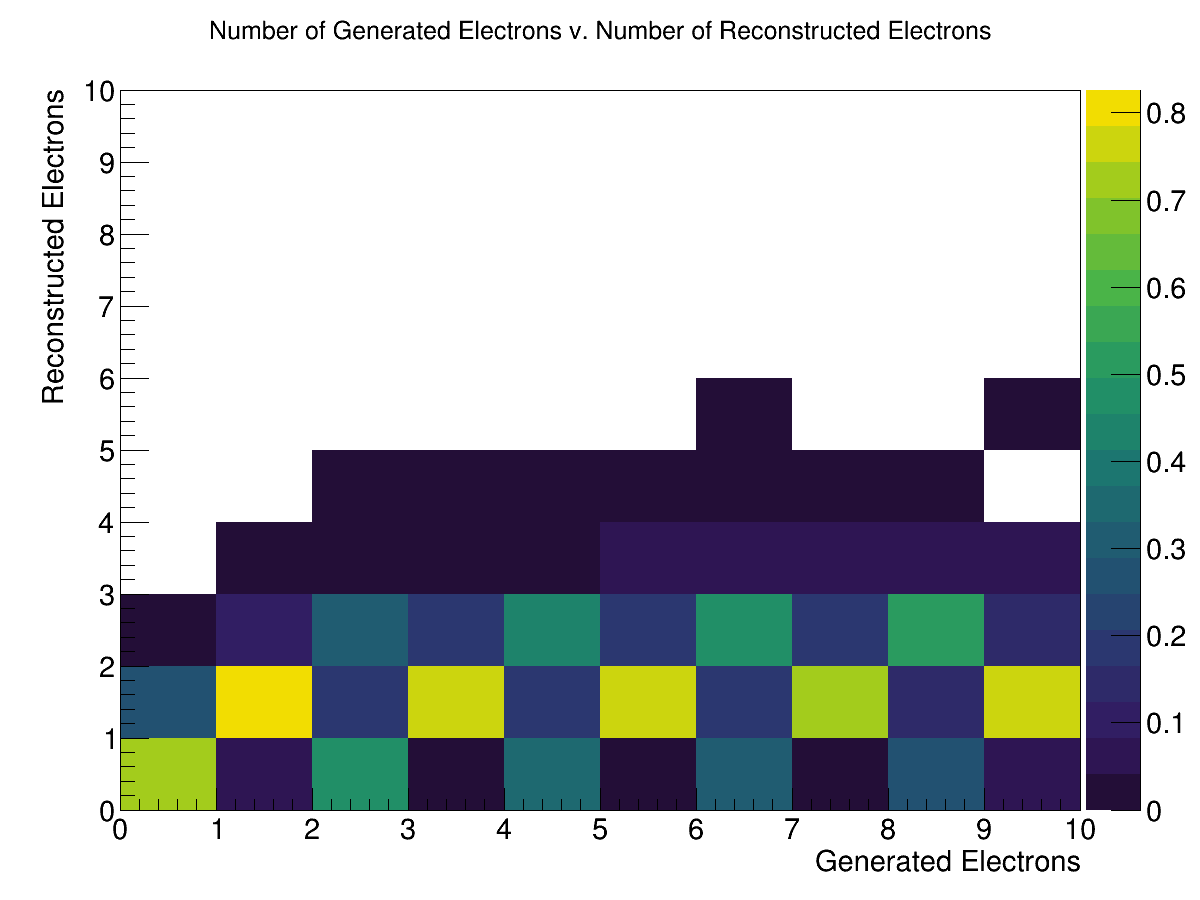

In [17]:
rs_TTTT.nLepvsnJet_norm = normalize_columns(rs_TTTT.genEle_count_v_recEle_count)
rs_TTZ.nLepvsnJet_norm = normalize_columns(rs_TTZ.genEle_count_v_recEle_count)
rs_TTW.nLepvsnJet_norm = normalize_columns(rs_TTW.genEle_count_v_recEle_count)
clear()
rs_TTTT.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

In [18]:
event_number = int(random.uniform(0,100))
TTZ_event = show_event(rs_TTZ, event_number)
TTW_event = show_event(rs_TTW, event_number)
TTH1_event = show_event(rs_TTH1, event_number)
TTTT_event = show_event(rs_TTTT, event_number)

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Darker is lower, greener/lighter is higher. The following are the particle trees for event #{{event_number}} in each dataset.
  - TTZ Generator-Level Particles
{{TTZ_event}}
-----------------------------------------
  - TTW Generator-Level Particles
{{TTW_event}}
-----------------------------------------
  - TTH Generator-Level Particles
{{TTH1_event}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{TTTT_event}}

<ROOT.THStack object ("lepton_count_stack") at 0x1e5c1240>

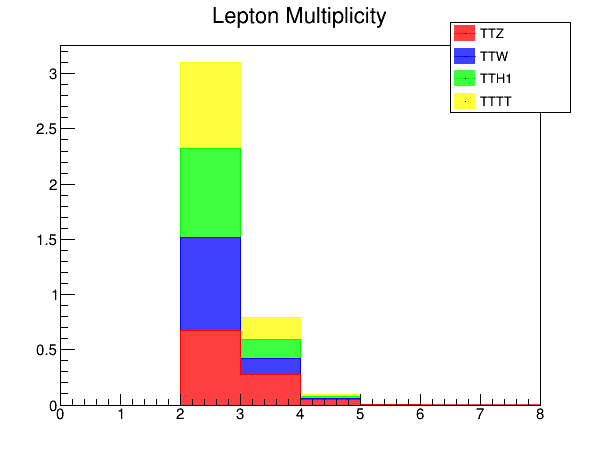

In [19]:
ResultSet.stack_hist("lepton_count", title="Lepton Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0x1102ad0>

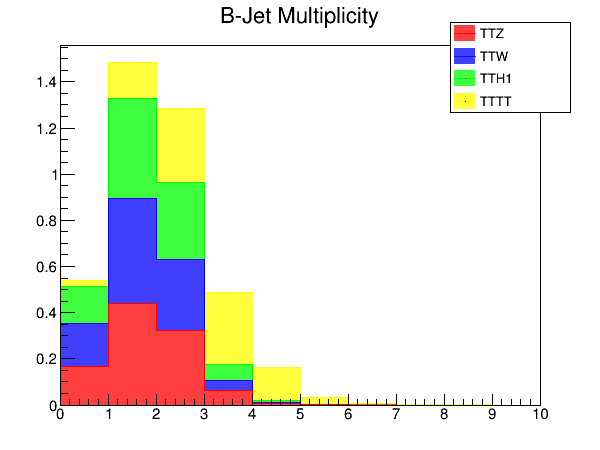

In [20]:
ResultSet.stack_hist("b_jet_count", title="B-Jet Multiplicity",
                     enable_fill=True, normalize_to=1, make_legend=True, draw=True)

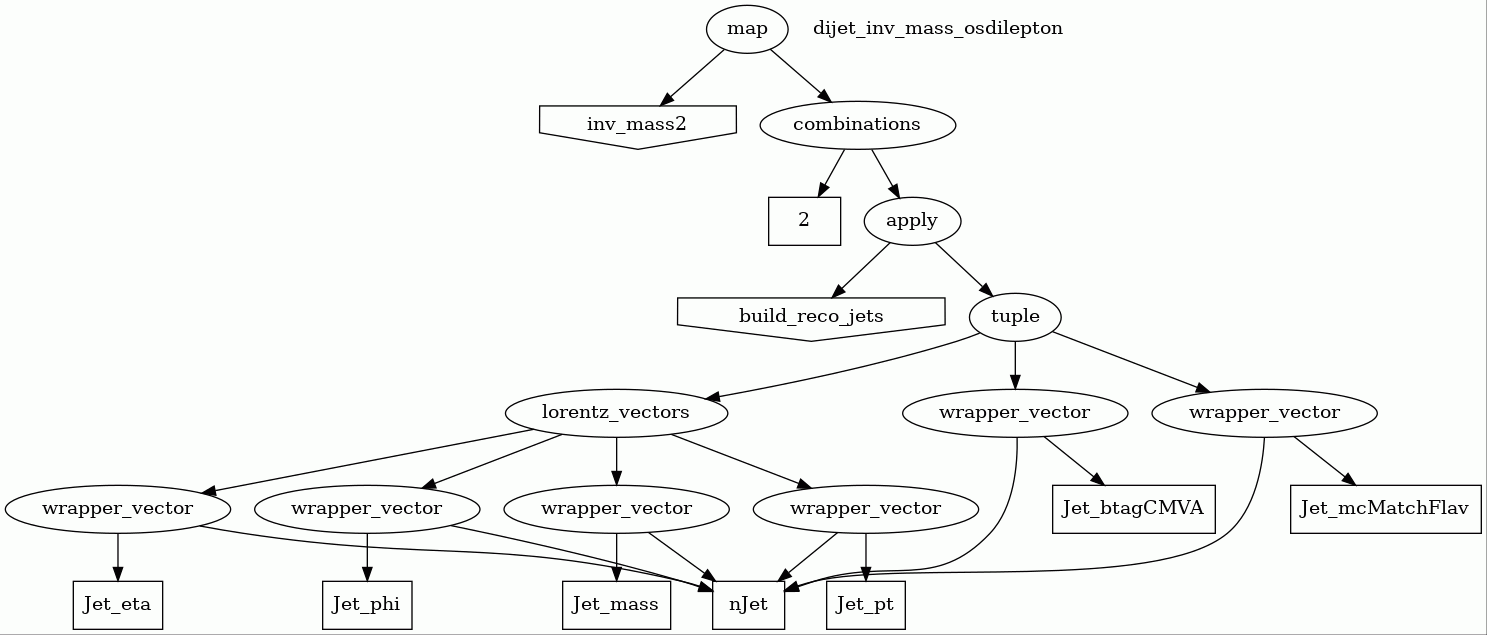

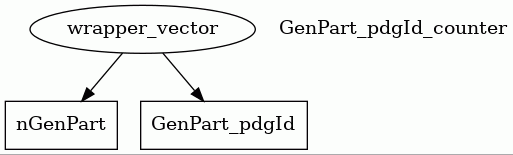

In [21]:
display(show_value(rs_TTTT, rs_TTTT.dijet_inv_mass_osdilepton)[0])
display(show_value(rs_TTTT, "GenPart_pdgId_counter")[0])